**INSTALL LIBRARY TFLite**

In [5]:
!pip install tflite-support-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 27.6 MB/s eta 0:00:00


**IMPORT LIBRARY**

In [6]:
import os
import random
import os
from shutil import copyfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

import flatbuffers
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python.metadata_writers import writer_utils
from tensorflow_lite_support.metadata.python.metadata_writers import image_classifier


**LOAD DATA**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [9]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Product Capstone/Development/ML/number_dataset.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [11]:
# Directory with number and alphabet pictures
number_0_dir = os.path.join('/tmp/number_dataset/0')
number_1_dir = os.path.join('/tmp/number_dataset/1')
number_2_dir = os.path.join('/tmp/number_dataset/2')
number_3_dir = os.path.join('/tmp/number_dataset/3')
number_4_dir = os.path.join('/tmp/number_dataset/4')
number_5_dir = os.path.join('/tmp/number_dataset/5')
number_6_dir = os.path.join('/tmp/number_dataset/6')
number_7_dir = os.path.join('/tmp/number_dataset/7')
number_8_dir = os.path.join('/tmp/number_dataset/8')
number_9_dir = os.path.join('/tmp/number_dataset/9')

In [12]:
number_0 = os.listdir(number_0_dir)
number_1 = os.listdir(number_1_dir)
number_2 = os.listdir(number_2_dir)
number_3 = os.listdir(number_3_dir)
number_4 = os.listdir(number_4_dir)
number_5 = os.listdir(number_5_dir)
number_6 = os.listdir(number_6_dir)
number_7 = os.listdir(number_7_dir)
number_8 = os.listdir(number_8_dir)
number_9 = os.listdir(number_9_dir)

In [13]:
# Printing the first 10 items in each directory
print(f'0: {number_0[:5]}')
print(f'1: {number_1[:5]}')
print(f'2: {number_2[:5]}')
print(f'3: {number_3[:5]}')
print(f'4: {number_4[:5]}')
print(f'5: {number_5[:5]}')
print(f'6: {number_6[:5]}')
print(f'7: {number_7[:5]}')
print(f'8: {number_8[:5]}')
print(f'9: {number_9[:5]}')

0: ['0_25_rotate_13.jpeg', '0_7_rotate_8.jpeg', '0_34_rotate_7.jpeg', '0_61_rotate_7.jpeg', '0_41_rotate_5.jpeg']
1: ['1_13_rotate_10.jpeg', 'IMG_5538.JPG', '1_10_rotate_8.jpeg', '1_70_rotate_8.jpeg', '1_43_rotate_8.jpeg']
2: ['IMG_4838.JPG', 'IMG_5076.JPG', '2_57_rotate_8.jpeg', '2_55_rotate_1.jpeg', '2_10_rotate_9.jpeg']
3: ['IMG_1253.JPG', '3_32_rotate_6.jpeg', '3_63_rotate_4.jpeg', '3_14_rotate_1.jpeg', '3_45_rotate_8.jpeg']
4: ['4_5_rotate_4.jpeg', '4_39_rotate_9.jpeg', 'IMG_4175.JPG', '4_32_rotate_4.jpeg', '4_17_rotate_4.jpeg']
5: ['5_14_rotate_6.jpeg', '5_49_rotate_9.jpeg', '5_36_rotate_2.jpeg', 'IMG_5609.JPG', '5_55_rotate_1.jpeg']
6: ['6_58_rotate_9.jpeg', '6_11_rotate_5.jpeg', 'IMG_4882.JPG', '6_17_rotate_2.jpeg', '6_4_rotate_1.jpeg']
7: ['IMG_5978.JPG', 'IMG_4671.JPG', 'IMG_5014.JPG', '7_69_rotate_8.jpeg', '7_15_rotate_8.jpeg']
8: ['8_29_rotate_4.jpeg', 'IMG_5545.JPG', '8_45_rotate_2.jpeg', '8_53_rotate_8.jpeg', '8_15_rotate_8.jpeg']
9: ['IMG_4845.JPG', '9_59_rotate_9.jpeg',

In [14]:
# Concatenate paths to each directory
total_data = [
    number_0_dir, number_1_dir, number_2_dir, number_3_dir, number_4_dir, number_5_dir,
    number_6_dir, number_7_dir, number_8_dir, number_9_dir
]

# Initialize the variable for the total number of images
total_images = 0

# Iterate through all directories and count the number of files
for total in total_data:
    total_images += len(os.listdir(total))

print(f'Total images: {total_images}')

Total images: 9201


**SPLIT DATA**

In [15]:
def split_data(source, training, validation, split_size):
    files = os.listdir(source)
    files = [file for file in files if os.path.getsize(os.path.join(source, file)) > 0]

    # Calculate lengths for each set
    num_files = len(files)
    num_training = int(num_files * split_size)

    # Shuffle the files
    random.shuffle(files)

    # Split into sets
    training_set = files[:num_training]
    validation_set = files[num_training:]

    # Copy files to respective directories
    for filename in training_set:
        this_file = os.path.join(source, filename)
        destination = os.path.join(training, filename)
        copyfile(this_file, destination)

    for filename in validation_set:
        this_file = os.path.join(source, filename)
        destination = os.path.join(validation, filename)
        copyfile(this_file, destination)

# Define source and destination directories
source_dir = "/tmp/number_dataset/"
training_dir = "/tmp/training/"
validation_dir = "/tmp/validation/"

# Define split size as a float (training_size)
split_size = 0.8

# Iterate over each label directory
for label in os.listdir(source_dir):
    label_source_dir = os.path.join(source_dir, label)
    label_training_dir = os.path.join(training_dir, label)
    label_validation_dir = os.path.join(validation_dir, label)

    # Create training and validation directories if they don't exist
    os.makedirs(label_training_dir, exist_ok=True)
    os.makedirs(label_validation_dir, exist_ok=True)

    # Split data for each label
    split_data(label_source_dir, label_training_dir, label_validation_dir, split_size)

In [16]:
# Define directories
training_dir = "/tmp/training/"
validation_dir = "/tmp/validation/"

# Function to count images in subdirectories
def count_images_in_subdirs(directory):
    count = 0
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        count += len(os.listdir(label_dir))
    return count

# Count images in training, testing, and validation directories
num_training_images = count_images_in_subdirs(training_dir)
num_validation_images = count_images_in_subdirs(validation_dir)

# Print the counts
print("Number of training images:", num_training_images)
print("Number of validation images:", num_validation_images)

Number of training images: 7355
Number of validation images: 1846


**DATA AUGMENTATION**

In [17]:
# Define directories
training_dir = "/tmp/training/"
validation_dir = "/tmp/validation/"


# Count images in training and validation directories
num_training_images = count_images_in_subdirs(training_dir)
num_validation_images = count_images_in_subdirs(validation_dir)

# Print the counts
print("Number of training images:", num_training_images)
print("Number of validation images:", num_validation_images)
print("")

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(224, 224),
    batch_size=32,  # Adjust based on your hardware capabilities
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,  # Adjust based on your hardware capabilities
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

# Check a few batches from the generators to ensure everything is working fine
for data_batch, labels_batch in train_generator:
    print("")
    print('Training data batch shape:', data_batch.shape)
    print('Training labels batch shape:', labels_batch.shape)
    print("")
    break

for data_batch, labels_batch in validation_generator:
    print('Validation data batch shape:', data_batch.shape)
    print('Validation labels batch shape:', labels_batch.shape)
    break

Number of training images: 7355
Number of validation images: 1846

Found 7355 images belonging to 10 classes.
Found 1846 images belonging to 10 classes.

Training data batch shape: (32, 224, 224, 3)
Training labels batch shape: (32, 10)

Validation data batch shape: (32, 224, 224, 3)
Validation labels batch shape: (32, 10)


**EXAMINE and VISUALIZE DATASET**

In [18]:
labels = list(train_generator.class_indices.keys())
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


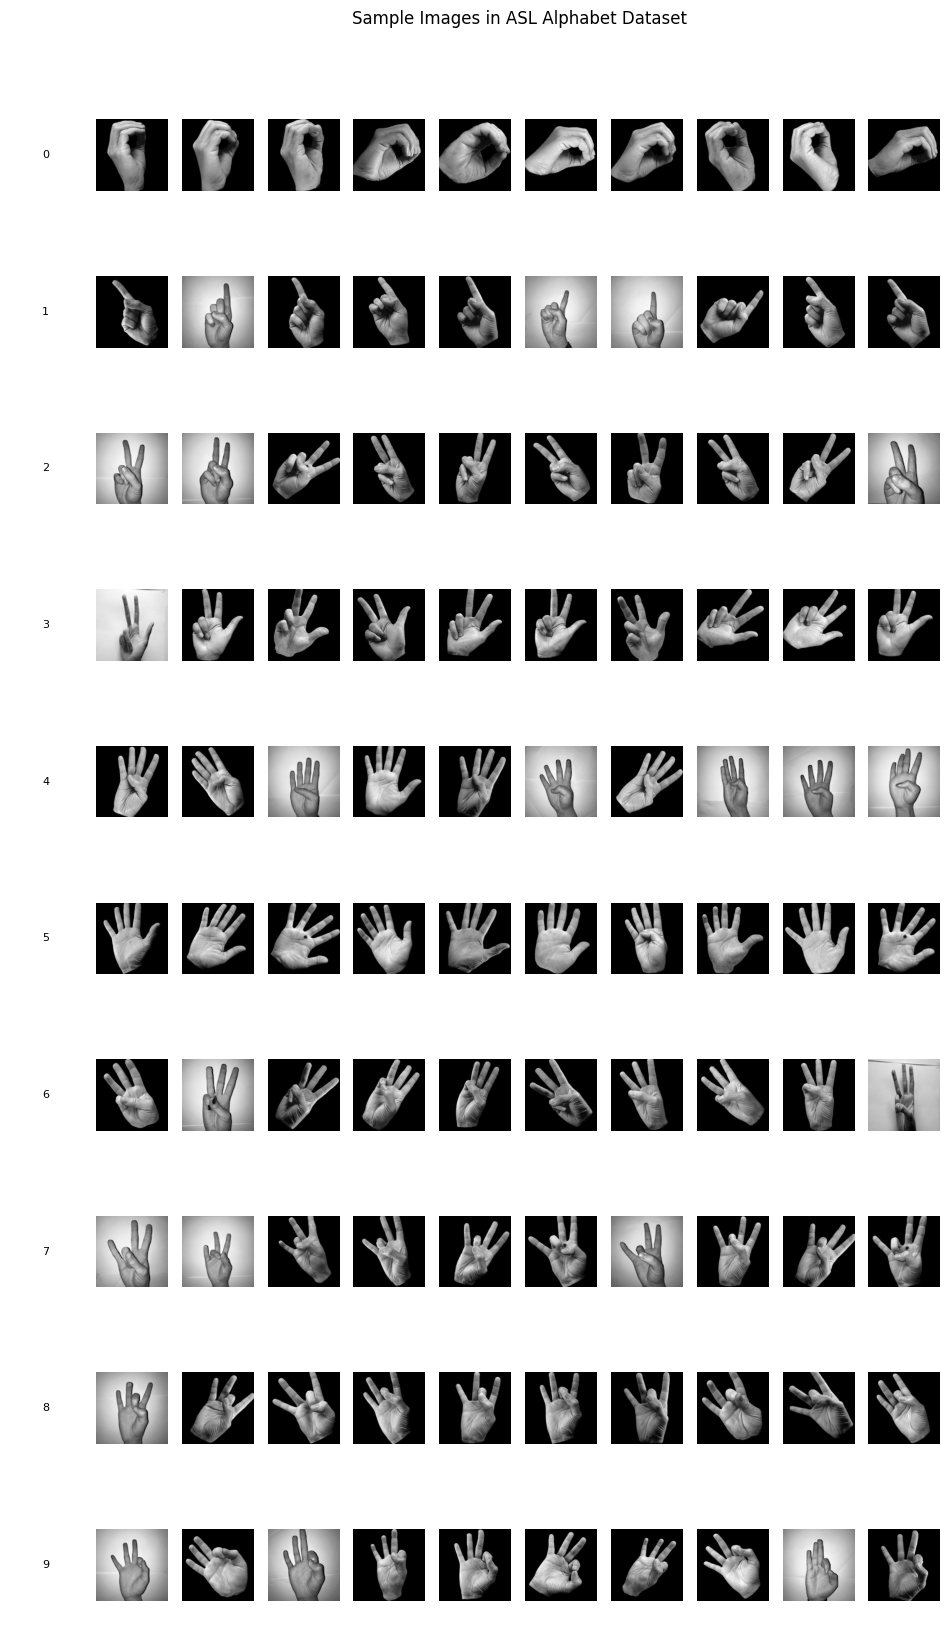

In [19]:
train_path = training_dir
def sample_images(labels):
    # Create Subplots
    y_size = 12
    if(len(labels)<10):
        y_size = y_size * len(labels) / 10
    fig, axs = plt.subplots(len(labels), 11, figsize=(y_size, 20))

    for i, label in enumerate(labels):
        axs[i, 0].text(0.5, 0.5, label, ha='center', va='center', fontsize=8)
        axs[i, 0].axis('off')

        label_path = os.path.join(train_path, label)
        list_files = os.listdir(label_path)

        for j in range(10):
            img_label = cv2.imread(os.path.join(label_path, list_files[j]))
            img_label = cv2.cvtColor(img_label, cv2.COLOR_BGR2GRAY)
            axs[i, j+1].imshow(img_label, cmap='gray')
            axs[i, j+1].axis("off")

    # Title
    plt.suptitle("Sample Images in ASL Alphabet Dataset", x=0.55, y=0.92)

    # Show
    plt.imshow(img_label, cmap='gray')
    plt.axis('off')
    plt.show()

sample_images(labels[:10])

**CREATE MODEL**

In [20]:
# Definisikan model
pretrainedModel = tf.keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3),
    include_top=True,
    weights="imagenet",
)

pretrainedModel.trainable = False

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

10734624/10734624 [==============================] - 0s 0us/step


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\n Accuracy is more than 95%, stopping...")
            self.model.stop_training = True

callback = myCallback()

checkpoint_filepath = '/tmp/ckpt/checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[callback]
 )

Epoch 1/50
230/230 [==============================] - 116s 468ms/step - loss: 2.1161 - accuracy: 0.2166 - val_loss: 1.6024 - val_accuracy: 0.4626
Epoch 2/50
230/230 [==============================] - 103s 450ms/step - loss: 1.6741 - accuracy: 0.3855 - val_loss: 1.1516 - val_accuracy: 0.6446
Epoch 3/50
230/230 [==============================] - 108s 471ms/step - loss: 1.3673 - accuracy: 0.4978 - val_loss: 0.8584 - val_accuracy: 0.7210
Epoch 4/50
230/230 [==============================] - 102s 444ms/step - loss: 1.2026 - accuracy: 0.5674 - val_loss: 0.7391 - val_accuracy: 0.7763
Epoch 5/50
230/230 [==============================] - 104s 452ms/step - loss: 1.0451 - accuracy: 0.6280 - val_loss: 0.5228 - val_accuracy: 0.8445
Epoch 6/50
230/230 [==============================] - 102s 442ms/step - loss: 0.9069 - accuracy: 0.6778 - val_loss: 0.4830 - val_accuracy: 0.8592
Epoch 7/50
230/230 [==============================] - 103s 446ms/step - loss: 0.8248 - accuracy: 0.7061 - val_loss: 0.3865 -

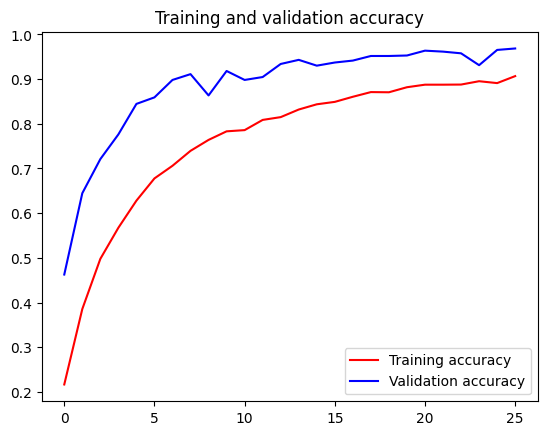

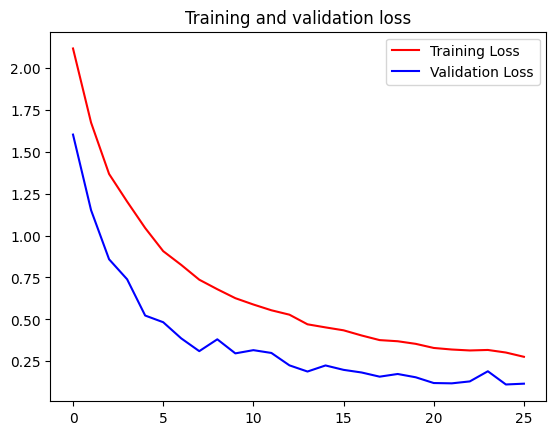

In [24]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
# Simpan model yang telah dilatih
model.save('number_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
input_shape = model.input_shape
output_shape = model.output_shape

print("Input shape:", input_shape)
print("Output shape:", output_shape)

Input shape: (None, 224, 224, 3)
Output shape: (None, 10)


**SAVE zip MODEL**

In [27]:
export_dir = '/content/model'
tf.saved_model.save(model, export_dir)

In [28]:
with open('label.txt', 'w') as f:
    for label in train_generator.class_indices:
        f.write(label + '\n')

In [29]:
!zip -r /content/model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 88%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 28%)
  adding: content/model/variables/variables.index (deflated 65%)
  adding: content/model/fingerprint.pb (stored 0%)


In [30]:
zip_ref = zipfile.ZipFile("/content/model.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [31]:
export_dir = '/content/content/model'

**CONVERT model.h5 TO model.tflite**

In [33]:
import tensorflow as tf

# Muat model Keras
model = tf.keras.models.load_model('/content/number_classifier_model.h5')

# Buat converter dari model Keras ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Opsi konversi (optional, bisa dioptimalkan lebih lanjut)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi model
tflite_model = converter.convert()

# Simpan model TFLite ke file
tflite_model_path = '/content/number_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite models are stored in: {tflite_model_path}")

TFLite models are stored in: /content/number_model.tflite


**ADDING METADATA**

In [34]:

ImageClassifierWriter = image_classifier.MetadataWriter

_MODEL_PATH = "/content/number_model.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "/content/label.txt"
_SAVE_TO_PATH = "/content/Digit_v1_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba